# Data Research Project

### Idea

1. Collecting Apple Stocks data from Yahoo Finance Website through Scraping
2. COllecting data from a flat file, a CSV
3. Collecting data from Pandas webreader API
4. Merging the three data and performing data analysis and data munging.


## 1. Scraped Data

#### Download the data from https://finance.yahoo.com.

In [48]:
import re
from io import StringIO
from datetime import datetime, timedelta

import requests
import pandas as pd


class YahooFinanceHistory:
    timeout = 2
    crumb_link = 'https://finance.yahoo.com/quote/{0}/history?p={0}'
    crumble_regex = r'CrumbStore":{"crumb":"(.*?)"}'
    quote_link = 'https://query1.finance.yahoo.com/v7/finance/download/{quote}?period1={dfrom}&period2={dto}&interval=1d&events=history&crumb={crumb}'

    def __init__(self, symbol, days_back=7):
        self.symbol = symbol
        self.session = requests.Session()
        self.dt = timedelta(days=days_back)

    def get_crumb(self):
        response = self.session.get(self.crumb_link.format(self.symbol), timeout=self.timeout)
        response.raise_for_status()
        match = re.search(self.crumble_regex, response.text)
        if not match:
            raise ValueError('Could not get crumb from Yahoo Finance')
        else:
            self.crumb = match.group(1)

    def get_quote(self):
        if not hasattr(self, 'crumb') or len(self.session.cookies) == 0:
            self.get_crumb()
        now = datetime.utcnow()
        dateto = int(now.timestamp())
        datefrom = int((now - self.dt).timestamp())
        url = self.quote_link.format(quote=self.symbol, dfrom=datefrom, dto=dateto, crumb=self.crumb)
        response = self.session.get(url)
        response.raise_for_status()
        return pd.read_csv(StringIO(response.text), parse_dates=['Date'])

    
sraped_df = YahooFinanceHistory('AAPL', days_back=30).get_quote()

In [49]:
sraped_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-03-23,123.330002,124.239998,122.139999,122.540001,122.540001,95467100
1,2021-03-24,122.820000,122.900002,120.070000,120.089996,120.089996,88530500
2,2021-03-25,119.540001,121.660004,119.000000,120.589996,120.589996,98844700
3,2021-03-26,120.349998,121.480003,118.919998,121.209999,121.209999,93958900
4,2021-03-29,121.650002,122.580002,120.730003,121.389999,121.389999,80819200


In [51]:
sraped_df = sraped_df[['Date', 'High', 'Low', 'Open',"Close", "Volume"]]
sraped_df['Date'] = pd.to_datetime(sraped_df['Date'])
sraped_df

,Date,High,Low,Open,Close,Volume
0,2021-03-23,124.239998,122.139999,123.330002,122.540001,95467100
1,2021-03-24,122.900002,120.070000,122.820000,120.089996,88530500
2,2021-03-25,121.660004,119.000000,119.540001,120.589996,98844700
3,2021-03-26,121.480003,118.919998,120.349998,121.209999,93958900
4,2021-03-29,122.580002,120.730003,121.650002,121.389999,80819200
5,2021-03-30,120.400002,118.860001,120.110001,119.900002,85671900
6,2021-03-31,123.519997,121.150002,121.650002,122.150002,118323800
7,2021-04-01,124.180000,122.489998,123.660004,123.000000,74957400
8,2021-04-05,126.160004,123.070000,123.870003,125.900002,88651200
9,2021-04-06,127.129997,125.650002,126.500000,126.209999,80171300


# 2. From a Flat File

In [52]:
import pandas as pd
data_flatFile = pd.read_csv('AAPLHistoricalQuotes.csv')
data_flatFile

data_flatFile.columns = ['Date', 'Close', 'Volume', 'Open',"High", "Low"]

data_flatFile = data_flatFile[['Date', 'High', 'Low', 'Open',"Close", "Volume"]]

data_flatFile['Date'] = pd.to_datetime(data_flatFile['Date'])
data_flatFile

,Date,High,Low,Open,Close,Volume
0,2020-02-28,$278.41,$256.37,$257.26,$273.36,106721200
1,2020-02-27,$286,$272.96,$281.1,$273.52,80151380
2,2020-02-26,$297.88,$286.5,$286.53,$292.65,49678430
3,2020-02-25,$302.53,$286.13,$300.95,$288.08,57668360
4,2020-02-24,$304.18,$289.23,$297.26,$298.18,55548830
...,...,...,...,...,...,...
2513,2010-03-05,$31.3857,$30.6614,$30.7057,$31.2786,224647427
2514,2010-03-04,$30.1314,$29.8043,$29.8971,$30.1014,89591907
2515,2010-03-03,$29.9814,$29.7057,$29.8486,$29.9043,92846488
2516,2010-03-02,$30.1186,$29.6771,$29.99,$29.8357,141486282


## 3. From API

In [60]:
from pandas_datareader import data
# pulling all available historical data for AAPL

# yahoo api is inconsistent for getting historical data, please use google instead.
AAPL_api = data.DataReader('AAPL', 'yahoo', '2020-03-01', '2021-03-22')

In [61]:
AAPL_api.reset_index(inplace=True)

In [62]:
AAPL_api.drop(['Adj Close'], axis= 1, inplace=True)

AAPL_api = AAPL_api[['Date', 'High', 'Low', 'Open',"Close", "Volume"]]
AAPL_api['Date'] = pd.to_datetime(AAPL_api['Date'])

AAPL_api

,Date,High,Low,Open,Close,Volume
0,2020-03-02,75.360001,69.430000,70.570000,74.702499,341397200.0
1,2020-03-03,76.000000,71.449997,75.917503,72.330002,319475600.0
2,2020-03-04,75.849998,73.282501,74.110001,75.684998,219178400.0
3,2020-03-05,74.887497,72.852501,73.879997,73.230003,187572800.0
4,2020-03-06,72.705002,70.307503,70.500000,72.257500,226176800.0
...,...,...,...,...,...,...
262,2021-03-16,127.220001,124.720001,125.699997,125.570000,114740000.0
263,2021-03-17,125.860001,122.339996,124.050003,124.760002,111437500.0
264,2021-03-18,123.180000,120.320000,122.879997,120.529999,121229700.0
265,2021-03-19,121.430000,119.680000,119.900002,119.989998,185023200.0


In [ ]:
data_flatFile = data_flatFile[::-1]

In [128]:
### Merging datasets togther
finalDF = pd.concat([data_flatFile,AAPL_api,sraped_df], axis = 0)

In [129]:
finalDF

,Date,High,Low,Open,Close,Volume
2517,2010-03-01,$29.9286,$29.35,$29.3928,$29.8557,137312041.0
2516,2010-03-02,$30.1186,$29.6771,$29.99,$29.8357,141486282.0
2515,2010-03-03,$29.9814,$29.7057,$29.8486,$29.9043,92846488.0
2514,2010-03-04,$30.1314,$29.8043,$29.8971,$30.1014,89591907.0
2513,2010-03-05,$31.3857,$30.6614,$30.7057,$31.2786,224647427.0
...,...,...,...,...,...,...
16,2021-04-15,135.000000,133.639999,133.820007,134.500000,89347100.0
17,2021-04-16,134.669998,133.279999,134.300003,134.160004,84818500.0
18,2021-04-19,135.470001,133.339996,133.509995,134.839996,93996100.0
19,2021-04-20,135.529999,131.809998,135.020004,133.110001,94660400.0


Now, the FinalDF consists the data from 2010 to to today which has been taken from three sources, with different columns.

## Remove $ sign from the first enteries which are scraped.

In [130]:
finalDF['High'] = finalDF['High'].replace({'\$':''}, regex = True)
finalDF['Low'] = finalDF['Low'].replace({'\$':''}, regex = True)
finalDF['Open'] = finalDF['Open'].replace({'\$':''}, regex = True)
finalDF['Close'] = finalDF['Close'].replace({'\$':''}, regex = True)

In [131]:
finalDF.head()

,Date,High,Low,Open,Close,Volume
2517,2010-03-01,29.9286,29.35,29.3928,29.8557,137312041.0
2516,2010-03-02,30.1186,29.6771,29.99,29.8357,141486282.0
2515,2010-03-03,29.9814,29.7057,29.8486,29.9043,92846488.0
2514,2010-03-04,30.1314,29.8043,29.8971,30.1014,89591907.0
2513,2010-03-05,31.3857,30.6614,30.7057,31.2786,224647427.0


In [132]:
finalDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2806 entries, 2517 to 20
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2806 non-null   datetime64[ns]
 1   High    2806 non-null   object        
 2   Low     2806 non-null   object        
 3   Open    2806 non-null   object        
 4   Close   2806 non-null   object        
 5   Volume  2806 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 153.5+ KB


### Convert object to numerical type

In [133]:
finalDF['High'] = finalDF['High'].astype(float)
finalDF['Low'] = finalDF['Low'].astype(float)
finalDF['Open'] = finalDF['Open'].astype(float)
finalDF['Close'] = finalDF['Close'].astype(float)

In [134]:
finalDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2806 entries, 2517 to 20
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2806 non-null   datetime64[ns]
 1   High    2806 non-null   float64       
 2   Low     2806 non-null   float64       
 3   Open    2806 non-null   float64       
 4   Close   2806 non-null   float64       
 5   Volume  2806 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 153.5 KB


### Create a columns as HIgh-Low difference

In [135]:
finalDF['High Low differce'] = finalDF['High'] - finalDF['Low']
finalDF

,Date,High,Low,Open,Close,Volume,High Low differce
2517,2010-03-01,29.928600,29.350000,29.392800,29.855700,137312041.0,0.578600
2516,2010-03-02,30.118600,29.677100,29.990000,29.835700,141486282.0,0.441500
2515,2010-03-03,29.981400,29.705700,29.848600,29.904300,92846488.0,0.275700
2514,2010-03-04,30.131400,29.804300,29.897100,30.101400,89591907.0,0.327100
2513,2010-03-05,31.385700,30.661400,30.705700,31.278600,224647427.0,0.724300
...,...,...,...,...,...,...,...
16,2021-04-15,135.000000,133.639999,133.820007,134.500000,89347100.0,1.360001
17,2021-04-16,134.669998,133.279999,134.300003,134.160004,84818500.0,1.389999
18,2021-04-19,135.470001,133.339996,133.509995,134.839996,93996100.0,2.130005
19,2021-04-20,135.529999,131.809998,135.020004,133.110001,94660400.0,3.720001


### Check for missing Values

In [136]:
finalDF.isnull().sum()

Date                 0
High                 0
Low                  0
Open                 0
Close                0
Volume               0
High Low differce    0
dtype: int64

There are no Missing Values

### Create log-transform of Close column

In [137]:
finalDF['Log Close'] = np.log(finalDF['Close'])

<IPython.core.display.Javascript object>

In [138]:
finalDF

,Date,High,Low,Open,Close,Volume,High Low differce,Log Close
2517,2010-03-01,29.928600,29.350000,29.392800,29.855700,137312041.0,0.578600,3.396376
2516,2010-03-02,30.118600,29.677100,29.990000,29.835700,141486282.0,0.441500,3.395706
2515,2010-03-03,29.981400,29.705700,29.848600,29.904300,92846488.0,0.275700,3.398002
2514,2010-03-04,30.131400,29.804300,29.897100,30.101400,89591907.0,0.327100,3.404572
2513,2010-03-05,31.385700,30.661400,30.705700,31.278600,224647427.0,0.724300,3.442934
...,...,...,...,...,...,...,...,...
16,2021-04-15,135.000000,133.639999,133.820007,134.500000,89347100.0,1.360001,4.901564
17,2021-04-16,134.669998,133.279999,134.300003,134.160004,84818500.0,1.389999,4.899033
18,2021-04-19,135.470001,133.339996,133.509995,134.839996,93996100.0,2.130005,4.904089
19,2021-04-20,135.529999,131.809998,135.020004,133.110001,94660400.0,3.720001,4.891176


## Calulate percent change of Closing Price

In [139]:
finalDF['Percent Change Close'] = finalDF['Close'].pct_change()

In [140]:
finalDF

,Date,High,Low,Open,Close,Volume,High Low differce,Log Close,Percent Change Close
2517,2010-03-01,29.928600,29.350000,29.392800,29.855700,137312041.0,0.578600,3.396376,NaN
2516,2010-03-02,30.118600,29.677100,29.990000,29.835700,141486282.0,0.441500,3.395706,-0.000670
2515,2010-03-03,29.981400,29.705700,29.848600,29.904300,92846488.0,0.275700,3.398002,0.002299
2514,2010-03-04,30.131400,29.804300,29.897100,30.101400,89591907.0,0.327100,3.404572,0.006591
2513,2010-03-05,31.385700,30.661400,30.705700,31.278600,224647427.0,0.724300,3.442934,0.039108
...,...,...,...,...,...,...,...,...,...
16,2021-04-15,135.000000,133.639999,133.820007,134.500000,89347100.0,1.360001,4.901564,0.018708
17,2021-04-16,134.669998,133.279999,134.300003,134.160004,84818500.0,1.389999,4.899033,-0.002528
18,2021-04-19,135.470001,133.339996,133.509995,134.839996,93996100.0,2.130005,4.904089,0.005069
19,2021-04-20,135.529999,131.809998,135.020004,133.110001,94660400.0,3.720001,4.891176,-0.012830


## Plot all the Columns

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

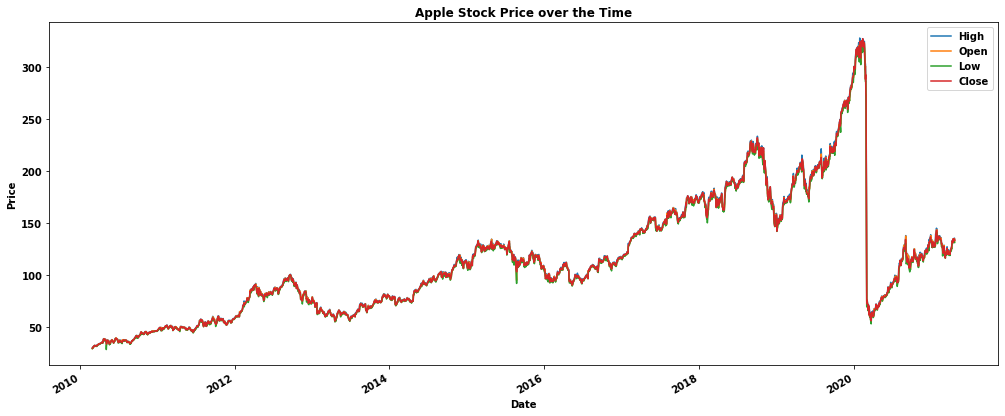

In [148]:
%matplotlib inline
#finalDF.set_index('Date', inplace=True)
finalDF[['High', 'Open', 'Low', 'Close']].plot(kind = 'line', figsize = (17,7));
plt.title('Apple Stock Price over the Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show();